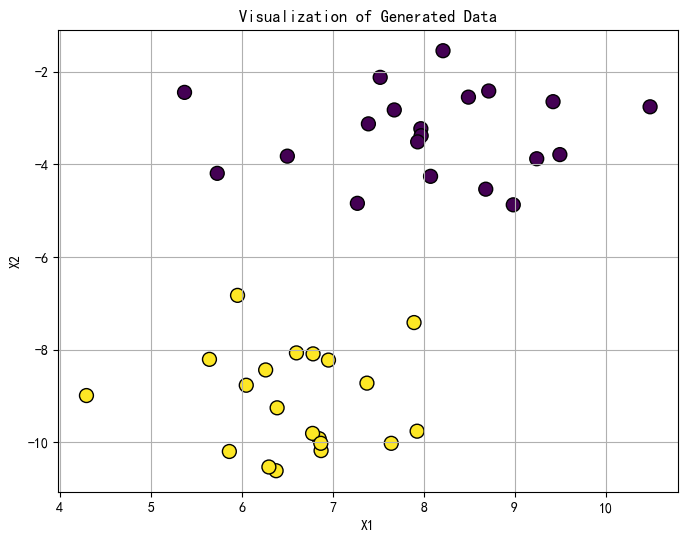

模型参数W: [[-0.2539717  -0.83806387]]
模型参数b: [-3.21132826]
支持向量为: [[ 7.27059007 -4.84225716]
 [ 5.95313618 -6.82945967]
 [ 7.89359985 -7.41655113]]
[[ 10 -10]] 预测为： [1] 类别
[[10 -2]] 预测为： [0] 类别


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19100\2131093786.py:72: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:


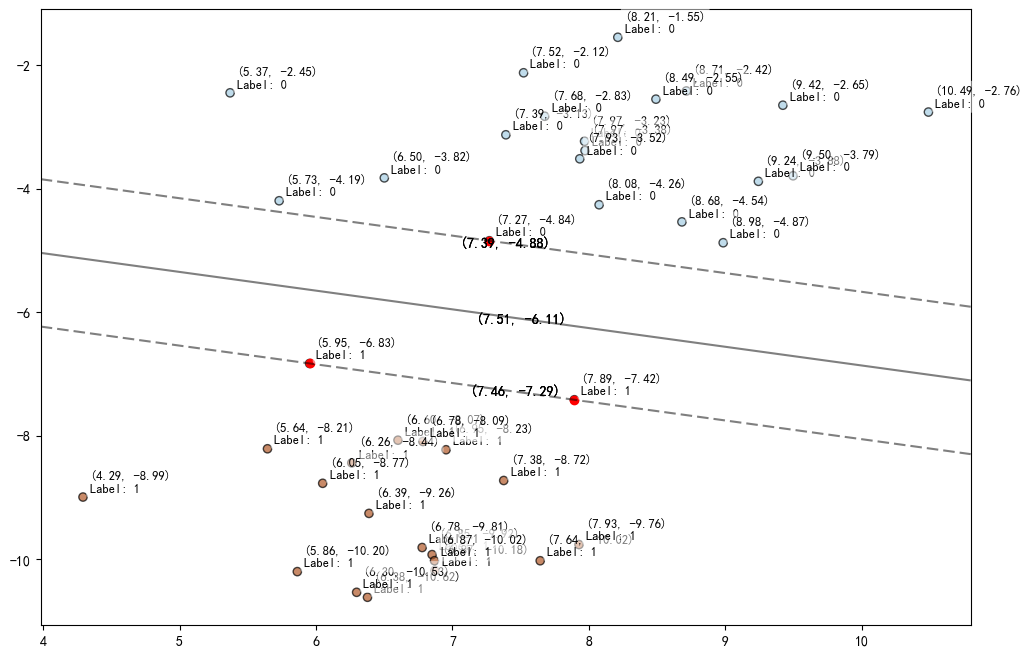

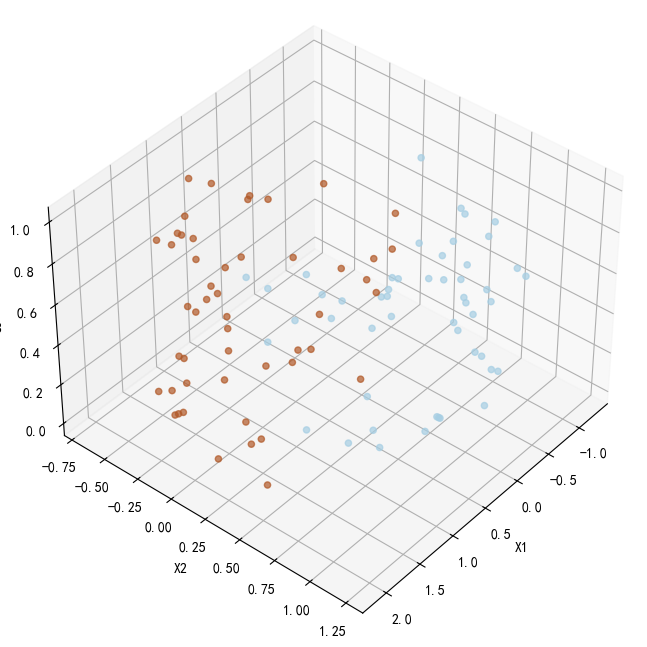

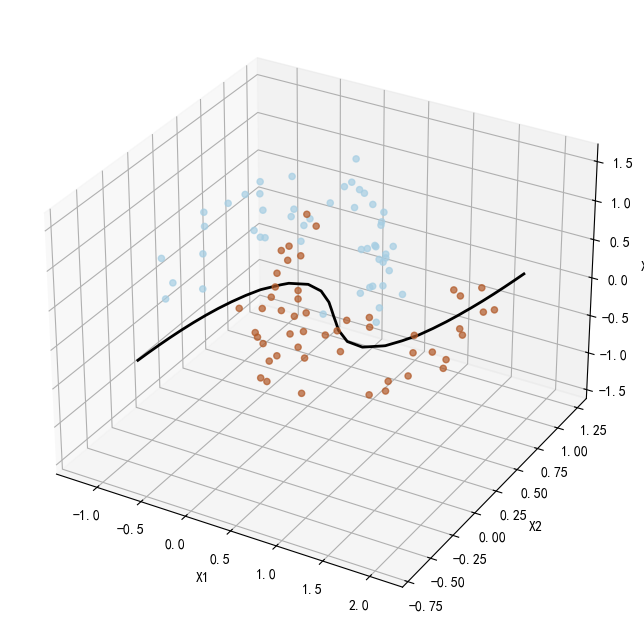

In [1]:
## 步骤一，导入本项目所需要的模块和包
# 导入所需模块
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs  # 修正了make_blobs拼写错误

# 设置字体为 SimHei，以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题


## 步骤二，随机生成数据，随机生成 40 个样本数据，数据分为两类。数据格式为（x1,x2,y），x1、x2 为数据的特征，y 是数据所属类别。
# 生成线性可分数据
X, y = make_blobs(n_samples=40, centers=2, random_state=6)  # 修正了参数中的拼写错误

# 可视化数据
plt.figure(figsize=(8, 6))  # 指定图像大小
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=100)  # 修正了逗号、括号等错误
plt.title("Visualization of Generated Data")  # 补全标题中的引号
plt.xlabel('X1')  # 修正X轴标签中的引号
plt.ylabel('X2')  # 修正Y轴标签中的引号
plt.grid(True)  # 显示网格
plt.show()  # 展示图像

## 步骤三，训练 SVM 模型，建立好一个未训练的 SVM 模型，将训练样本传给模型进行训练
clf = svm.SVC(kernel='linear', C=1000)  # SVC为SVM的一个分类模型，选择线性核函数
clf.fit(X, y)  # 使用数据X和y进行模型训练

print("模型参数W:", clf.coef_)  # 输出模型的权重参数W
print("模型参数b:", clf.intercept_)  # 输出模型的截距b
print("支持向量为:", clf.support_vectors_)  # 输出支持向量的信息

## 步骤四，使用新数据进行预测
# 第一个预测点
xpredict = [10, -10]  # 定义一个二维数据点
xpredict = np.array(xpredict).reshape(1, -1)  # 转换为适合SVM模型输入的形状
print(xpredict, "预测为：", clf.predict(xpredict), "类别")  # 输出预测结果

# 第二个预测点
xpredict = [10, -2]  # 定义第二个二维数据点
xpredict = np.array(xpredict).reshape(1, -1)  # 同样转换为适合模型的输入格式
print(xpredict, "预测为：", clf.predict(xpredict), "类别")  # 输出预测结果


## 步骤五，使用 matplotlib 库进行绘图，通过将间隔、划分超平面和支持向量描绘出来
# 1. 可视化数据点
plt.figure(figsize=(12, 8))  # 设置图像大小
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, alpha=0.7, edgecolors='k')  # 绘制散点图

# 2. 在每个数据点上添加坐标和分类标签
for i in range(len(X)):
    plt.text(X[i, 0] + 0.05, X[i, 1] + 0.05, f'({X[i, 0]:.2f}, {X[i, 1]:.2f})\nLabel: {y[i]}',
             fontsize=9, ha='left', va='bottom', color='black', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

# 3. 绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()  # 获取X轴范围
ylim = ax.get_ylim()  # 获取Y轴范围
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)  # 计算决策函数值

# 4. 绘制分类边界
contour = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# 5. 在决策边界上添加坐标标签
for i, level in enumerate(contour.levels):
    for collection in contour.collections:
        for path in collection.get_paths():
            vertices = path.vertices
            mid_point = vertices[len(vertices) // 2]  # 取中点
            plt.text(mid_point[0], mid_point[1], f'({mid_point[0]:.2f}, {mid_point[1]:.2f})',
                     fontsize=10, ha='center', va='center')

# 6. 绘制支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], linewidth=1, facecolors='red', label='Support Vectors')

plt.show()  # 显示图像

## 步骤六，生成线性不可分数据
# 导入必要的库和数据生成器
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

# 1. 生成线性不可分的数据（使用make_moons生成月牙形数据）
X, y = make_moons(n_samples=100, noise=0.1, random_state=6)  # n_samples表示生成的数据点个数，noise增加随机噪声

# 2. 为数据添加一个随机的第三维度
Z = np.random.rand(X.shape[0])  # 生成与数据点个数相同的随机数作为第三维数据
X_3d = np.column_stack((X, Z))  # 合并二维数据X和随机生成的第三维Z，形成三维数据

# 3. 可视化三维数据点
fig = plt.figure(figsize=(14, 8))  # 设置图形的大小
ax = fig.add_subplot(111, projection='3d')  # 添加一个3D坐标轴

# 绘制三维散点图
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap=plt.cm.Paired, alpha=0.7)  # 使用颜色区分类别

# 4. 设置坐标轴标签
ax.set_xlabel('X1', fontsize=10)  # 设置X轴标签
ax.set_ylabel('X2', fontsize=10)  # 设置Y轴标签
ax.set_zlabel('X3', fontsize=10)  # 设置Z轴标签

# 5. 调整视角
ax.view_init(elev=40, azim=40)  # elev控制垂直角度，azim控制水平角度

# 6. 展示图像
plt.show()  # 

## 步骤七，对选择后的模型，输出分类结果的评价指标
# 1. 训练支持向量机模型，使用RBF核
clf = svm.SVC(kernel='rbf', C=1)  # 选择RBF核函数，惩罚参数C设为1
clf.fit(X_3d, y)  # 使用三维数据X_3d和标签y进行训练

# 2. 可视化三维数据点
fig = plt.figure(figsize=(12, 8))  # 设置图形大小
ax = fig.add_subplot(111, projection='3d')  # 添加三维坐标轴
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap=plt.cm.Paired, alpha=0.7)  # 绘制三维散点图

# 3. 绘制决策边界（超平面）
xx, yy = np.meshgrid(np.linspace(X_3d[:, 0].min(), X_3d[:, 0].max(), 20),
                     np.linspace(X_3d[:, 1].min(), X_3d[:, 1].max(), 20))  # 生成网格数据
zz = np.zeros(xx.shape)  # 初始化zz为0，用于绘制平面

# 4. 计算决策函数数值
# for i in range(xx.shape[0]):
#     for j in range(xx.shape[1]):
#         z = np.array([[xx[i, j], yy[i, j], 0]])  # 生成网格中的点，Z值为0，便于绘制
#         zz[i, j] = clf.decision_function(z)  # 计算决策函数值，填充到zz中

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        z = np.array([[xx[i, j], yy[i, j], 0]])  # 创建一个包含单个样本的数组
        zz[i, j] = clf.decision_function(z)[0]  # 从数组中提取第一个标量值

# 5. 绘制决策超平面
ax.contour3D(xx, yy, zz, levels=[0], colors='k', linewidths=2)  # 绘制等值为0的决策边界线

# 6. 设置图形标题和标签
ax.set_xlabel('X1', fontsize=10)  # 设置X1轴标签
ax.set_ylabel('X2', fontsize=10)  # 设置X2轴标签
ax.set_zlabel('X3', fontsize=10)  # 设置X3轴标签

# 7. 展示图像
plt.show()  # 显示图形



   type                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       958
           1       0.99      0.87      0.92       156

    accuracy                           0.98      1114
   macro avg       0.99      0.93      0.96      1114
weighted avg       0.98      0.98      0.98      1114



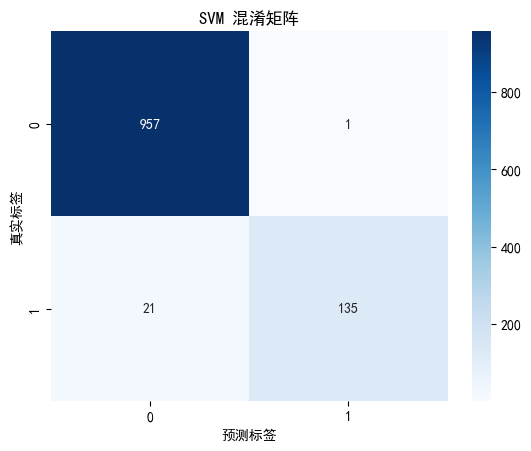

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       958
           1       1.00      0.82      0.90       156

    accuracy                           0.97      1114
   macro avg       0.99      0.91      0.94      1114
weighted avg       0.98      0.97      0.97      1114



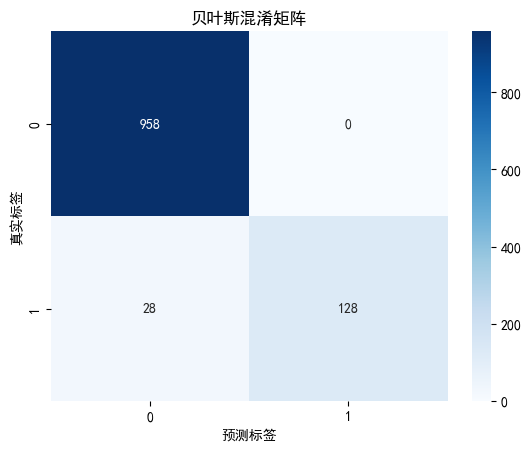

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       958
           1       0.93      0.87      0.90       156

    accuracy                           0.97      1114
   macro avg       0.95      0.93      0.94      1114
weighted avg       0.97      0.97      0.97      1114



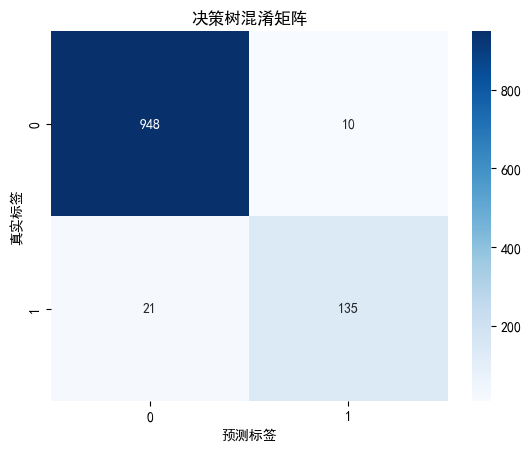

SVM 准确率: 0.98
Naive Bayes 准确率: 0.97
决策树 准确率: 0.97
SVM 在该数据集上的表现最好。


In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
# import matplotlib.pyplot as plt
# import seaborn as sns

# 设置字体为 SimHei，以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# Step 1: 加载数据集
# 数据集在 "E:/AI/Jupyter/data/垃圾短信的数据.csv" 文件中
df = pd.read_csv("E:/AI/Jupyter/data/垃圾短信的数据.csv", encoding='latin-1')

# 数据预处理：重命名列名，保留需要的列
df.columns = ['type', 'text']  # 保留两列：type和text
print(df.head())

# 将标签列转换为数值，spam = 1，ham = 0
df['type'] = df['type'].map({'spam': 1, 'ham': 0})

# Step 2: 特征提取
# 使用 Tfidf 向量化将文本转化为特征矩阵
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])
y = df['type']

# Step 3: 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: 特征选择
# 使用卡方检验进行特征选择
selector = SelectKBest(score_func=chi2, k=3000)  # 选择3000个最佳特征
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Step 5: 模型选择与训练
# 使用支持向量机（SVM）分类器
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# 训练SVM模型
svm_model.fit(X_train_selected, y_train)

# Step 6: 性能评估
# 使用测试集数据进行预测
y_pred = svm_model.predict(X_test_selected)

# 计算分类报告、混淆矩阵和准确率
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("SVM 混淆矩阵")
plt.show()

# Step 7: 与其他模型朴素贝叶斯和决策树比较
# 朴素贝叶斯分类器
nb_model = MultinomialNB()
nb_model.fit(X_train_selected, y_train)
y_pred_nb = nb_model.predict(X_test_selected)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# 绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("贝叶斯混淆矩阵")
plt.show()


# 决策树分类器
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_selected, y_train)
y_pred_tree = tree_model.predict(X_test_selected)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# 绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("决策树混淆矩阵")
plt.show()


# Step 8: 结论与讨论
# 比较不同模型的性能
svm_accuracy = accuracy_score(y_test, y_pred)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

print(f"SVM 准确率: {svm_accuracy:.2f}")
print(f"Naive Bayes 准确率: {nb_accuracy:.2f}")
print(f"决策树 准确率: {tree_accuracy:.2f}")

if svm_accuracy > max(nb_accuracy, tree_accuracy):
    print("SVM 在该数据集上的表现最好。")
elif nb_accuracy > max(svm_accuracy, tree_accuracy):
    print("Naive Bayes 在该数据集上的表现最好。")
else:
    print("决策树在该数据集上的表现最好。")


   type                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       958
           1       0.99      0.87      0.92       156

    accuracy                           0.98      1114
   macro avg       0.99      0.93      0.96      1114
weighted avg       0.98      0.98      0.98      1114



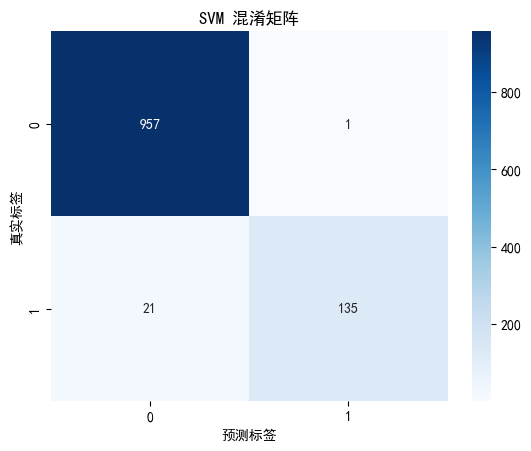

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       958
           1       0.93      0.87      0.90       156

    accuracy                           0.97      1114
   macro avg       0.95      0.93      0.94      1114
weighted avg       0.97      0.97      0.97      1114



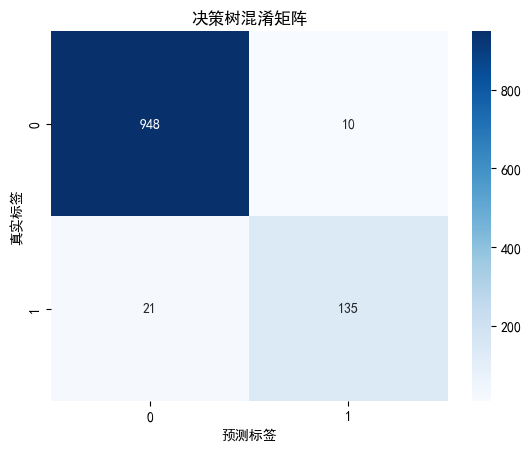

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8161 - loss: 0.4969 - val_accuracy: 0.9542 - val_loss: 0.1447
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9729 - loss: 0.0978 - val_accuracy: 0.9874 - val_loss: 0.0521
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9940 - loss: 0.0266 - val_accuracy: 0.9892 - val_loss: 0.0492
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9959 - loss: 0.0161 - val_accuracy: 0.9865 - val_loss: 0.0512
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9974 - loss: 0.0081 - val_accuracy: 0.9865 - val_loss: 0.0615
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9986 - loss: 0.0035 - val_accuracy: 0.9865 - val_loss: 0.0673
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0030 - val_accuracy: 0.9865 - val_loss: 0.0751
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.

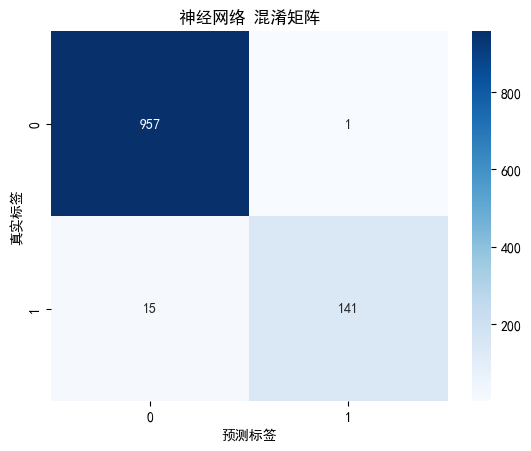

SVM 准确率: 0.98
决策树 准确率: 0.97
神经网络 准确率: 0.99
神经网络在该数据集上的表现最好。


In [5]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# 设置字体为 SimHei，以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# Step 1: 加载数据集
df = pd.read_csv("E:/AI/Jupyter/data/垃圾短信的数据.csv", encoding='latin-1')

# 数据预处理：重命名列名，保留需要的列
df.columns = ['type', 'text']
print(df.head())

# 将标签列转换为数值，spam = 1，ham = 0
df['type'] = df['type'].map({'spam': 1, 'ham': 0})

# Step 2: 特征提取
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])
y = df['type']

# Step 3: 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: 特征选择
selector = SelectKBest(score_func=chi2, k=3000)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Step 5: 使用支持向量机（SVM）
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_selected, y_train)
y_pred = svm_model.predict(X_test_selected)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("SVM 混淆矩阵")
plt.show()

# Step 6: 决策树模型
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_selected, y_train)
y_pred_tree = tree_model.predict(X_test_selected)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

conf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("决策树混淆矩阵")
plt.show()

# Step 7: 神经网络模型
nn_model = Sequential()
nn_model.add(Input(shape=(X_train_selected.shape[1],)))  # 定义输入层
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(1, activation='sigmoid'))  # 输出层

# 编译模型
nn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# 训练模型
history = nn_model.fit(X_train_selected, y_train, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test))

# 评估模型性能
nn_loss, nn_accuracy = nn_model.evaluate(X_test_selected, y_test, verbose=0)
print(f"神经网络 准确率: {nn_accuracy:.2f}")

# 使用神经网络进行预测
y_pred_nn = (nn_model.predict(X_test_selected) > 0.5).astype("int32")

print("神经网络 Classification Report:")
print(classification_report(y_test, y_pred_nn))

conf_matrix = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("神经网络 混淆矩阵")
plt.show()

# Step 8: 性能比较
svm_accuracy = accuracy_score(y_test, y_pred)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

print(f"SVM 准确率: {svm_accuracy:.2f}")
print(f"决策树 准确率: {tree_accuracy:.2f}")
print(f"神经网络 准确率: {nn_accuracy:.2f}")

if nn_accuracy > max(svm_accuracy, tree_accuracy):
    print("神经网络在该数据集上的表现最好。")
elif svm_accuracy > max(nn_accuracy, tree_accuracy):
    print("SVM 在该数据集上的表现最好。")
else:
    print("决策树在该数据集上的表现最好。")


   type                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       958
           1       0.99      0.87      0.92       156

    accuracy                           0.98      1114
   macro avg       0.99      0.93      0.96      1114
weighted avg       0.98      0.98      0.98      1114



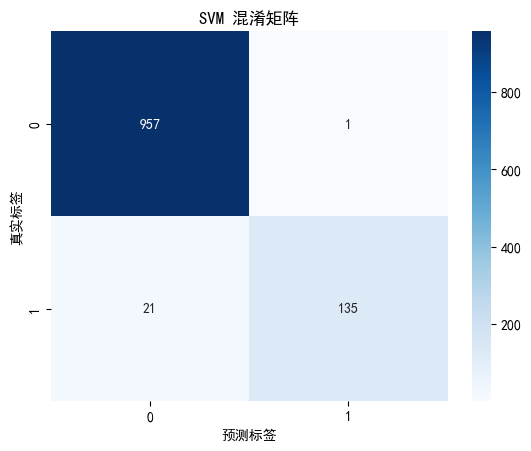

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       958
           1       0.93      0.87      0.90       156

    accuracy                           0.97      1114
   macro avg       0.95      0.93      0.94      1114
weighted avg       0.97      0.97      0.97      1114



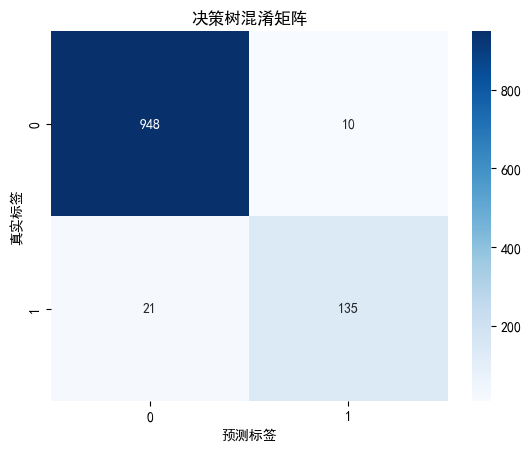

SVM 准确率: 0.98
决策树 准确率: 0.97
SVM 在该数据集上的表现最好。


In [8]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# 设置字体为 SimHei，以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# Step 1: 加载数据集
df = pd.read_csv("E:/AI/Jupyter/data/垃圾短信的数据.csv", encoding='latin-1')

# 数据预处理：重命名列名，保留需要的列
df.columns = ['type', 'text']
print(df.head())

# 将标签列转换为数值，spam = 1，ham = 0
df['type'] = df['type'].map({'spam': 1, 'ham': 0})

# Step 2: 特征提取
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])
y = df['type']

# Step 3: 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: 特征选择
selector = SelectKBest(score_func=chi2, k=3000)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Step 5: 使用支持向量机（SVM）
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_selected, y_train)
y_pred = svm_model.predict(X_test_selected)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("SVM 混淆矩阵")
plt.show()

# Step 6: 决策树模型
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_selected, y_train)
y_pred_tree = tree_model.predict(X_test_selected)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

conf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("决策树混淆矩阵")
plt.show()

# Step 7: 性能比较
svm_accuracy = accuracy_score(y_test, y_pred)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

print(f"SVM 准确率: {svm_accuracy:.2f}")
print(f"决策树 准确率: {tree_accuracy:.2f}")

if svm_accuracy > tree_accuracy:
    print("SVM 在该数据集上的表现最好。")
else:
    print("决策树在该数据集上的表现最好。")
